# Sea Level - Linear Regression

---


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [48]:
sea_level_data = pd.read_csv('epa-sea-level.csv')

sea_level_data = sea_level_data.rename(columns={'CSIRO Adjusted Sea Level': 'sea_level'})

sea_level = sea_level_data[['Year', 'sea_level']]

sea_level = sea_level.drop(0)

sea_level.reset_index()

sea_level.sort_values(by='Year')


,Year,sea_level
134,1880,0.000000
133,1881,0.220472
132,1882,-0.440945
131,1883,-0.232283
130,1884,0.590551
...,...,...
5,2009,8.586614
4,2010,8.901575
3,2011,8.964567
2,2012,9.326772


Text(42.26562499999999, 0.5, 'Sea Level (inches)')

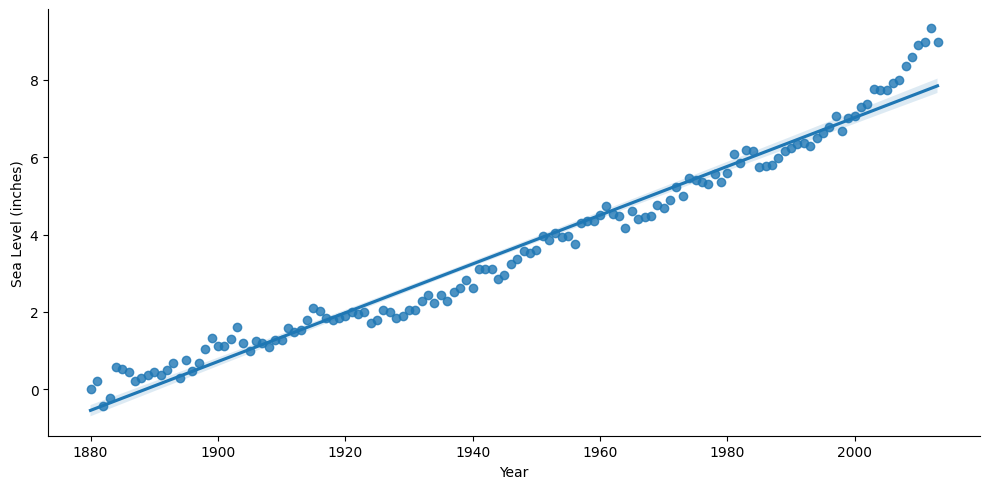

In [45]:
sns.lmplot(x='Year', y='sea_level', data=sea_level, aspect=2)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

## Determine Regression Model
---

In [50]:
x = sea_level.Year
y = sea_level.sea_level


slope, intercept, r, p, std_err = stats.linregress(x,y)

print(f'y = {slope}x + {intercept}')
print(f'r = {r}')
print(f'r^2 = {r**2}')
print(f'p = {p}')
print(f'std_err = {std_err}')

y = 0.06304458401213482x + -119.06594196773983
r = 0.9847571311825853
r^2 = 0.9697466074149556
p = 3.788696979107662e-102
std_err = 0.0009692118713287061


## Scikit-learn

In [54]:
from sklearn.linear_model import LinearRegression

X = sea_level.Year.values
y = sea_level.sea_level.values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()

model.fit(X, y)

print('slope:', model.coef_)
print('intercept:', model.intercept_)

r_sq = model.score(X, y)

print('coeff determination: {:.2%}'.format(r_sq))

slope: [[0.06304458]]
intercept: [-119.06594197]
coeff determination: 96.97%


## Predictions

In [55]:

year_2050_level = slope * 2050 + intercept

year_2050_level

np.float64(10.175455257136548)

In [58]:
scikit_pred = model.predict([[2050]])
scikit_pred[0][0]

np.float64(10.175455257136548)